In [1]:
import numpy as np
import pandas as pd

train_df = pd.read_csv('C:/Users/user/Desktop/Study/Kaggle/House_prices/Data_Files/train.csv')
test_df = pd.read_csv('C:/Users/user/Desktop/Study/Kaggle/House_prices/Data_Files/test.csv')
sub_df = pd.read_csv('C:/Users/user/Desktop/Study/Kaggle/House_prices/Data_Files/sample_submission.csv')

In [2]:
def Outlier(train_df, test_df):
    #Take most(mean) value on year data
    na_year = 'GarageYrBlt'
    index = 1132
    test_df.loc[index, na_year] = test_df[na_year].value_counts().index.tolist()[0]

def NaN(train_df, test_df):
    #Delete features which have over 500 NaN values
    na_train = train_df.isna().sum()
    drop_na_features = na_train[na_train > 500].index.tolist()
    train_df.drop(drop_na_features, axis = 1, inplace = True)
    test_df.drop(drop_na_features, axis = 1, inplace = True)
    
    # Take mean-value on continuous data
    Ct_feature_train = ['MasVnrArea', 'LotFrontage']
    Ct_feature_test = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'MasVnrArea', 'LotFrontage']

    for ele in Ct_feature_train:
        train_df[ele] = train_df[ele].fillna(train_df[ele].mean())
    for ele in Ct_feature_test:
        test_df[ele] = test_df[ele].fillna(test_df[ele].mean())

    #Take most(mean) value on rank
    Rk_feature_train = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'GarageQual', 'GarageCond']
    Rk_feature_test = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'GarageQual', 'GarageCond', 'KitchenQual']

    for ele in Rk_feature_train:
        train_df[ele] = train_df[ele].fillna(train_df[ele].value_counts().index.tolist()[0])
    for ele in Rk_feature_test:
        test_df[ele] = test_df[ele].fillna(test_df[ele].value_counts().index.tolist()[0])

    #Take most(mean) value on number data
    Nb_feature_test = ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']

    for ele in Nb_feature_test:
        test_df[ele] = test_df[ele].fillna(test_df[ele].value_counts().index.tolist()[0])

    #Take most(mean) value on year data
    na_year = 'GarageYrBlt'

    train_df[na_year] = train_df[na_year].fillna(train_df[na_year].value_counts().index.tolist()[0])
    test_df[na_year] = test_df[na_year].fillna(test_df[na_year].value_counts().index.tolist()[0])
    
    #Replace All NaN data
    nan_train_list = ['BsmtExposure', 'GarageType', 'GarageFinish', 'Electrical']
    nan_test_list = ['BsmtExposure', 'GarageType', 'GarageFinish', 'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Functional', 'SaleType']

    for ele in nan_train_list:
        train_df[ele] = train_df[ele].fillna(train_df[ele].value_counts().index.tolist()[0])
    for ele in nan_test_list:
        test_df[ele] = test_df[ele].fillna(test_df[ele].value_counts().index.tolist()[0])
def Encoding(train_df, test_df):
    OHE_list = ['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
                'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtExposure', 'Heating', 'CentralAir',
                'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']
    Rank_list = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 
                 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']

    from sklearn.preprocessing import OneHotEncoder
    from sklearn.preprocessing import LabelEncoder

    #Do OHE on category feature
    for ele in OHE_list:
        ohe = OneHotEncoder(sparse_output = False)
        train_ohe = ohe.fit_transform(train_df[ele].values.reshape(-1,1))
        test_ohe = ohe.transform(test_df[ele].values.reshape(-1,1))
        train_df = pd.concat([train_df, pd.DataFrame(train_ohe, columns = [ele + '_' + i for i in ohe.categories_[0]])], axis = 1)
        test_df = pd.concat([test_df, pd.DataFrame(test_ohe, columns = [ele + '_' + i for i in ohe.categories_[0]])], axis = 1)

    train_df.drop(OHE_list, axis = 1, inplace = True)
    test_df.drop(OHE_list, axis = 1, inplace = True)


    #Do LaebelEncoding on rank feature
    for ele in Rank_list:
        ohe = LabelEncoder()
        train_ohe = ohe.fit_transform(train_df[ele])
        test_ohe = ohe.transform(test_df[ele])
        train_df = pd.concat([train_df, pd.DataFrame(train_ohe, columns = [ele + '_label'])], axis = 1)
        test_df = pd.concat([test_df, pd.DataFrame(test_ohe, columns = [ele + '_label'])], axis = 1)

    train_df.drop(Rank_list, axis = 1, inplace = True)
    test_df.drop(Rank_list, axis = 1, inplace = True)

    df1 = train_df
    df2 = test_df
    return df1, df2

def Drop_Features(train_df, test_df):
    drop_list = ['Id', 'MSSubClass', 'Street', 'PavedDrive', 'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'BsmtFinType2_label']

    train_df.drop(drop_list, axis = 1, inplace = True)
    test_df.drop(drop_list, axis = 1, inplace = True)

def Combine(train_df, test_df):
    # Qual + Cond
    train_df['OverallRank'] = train_df['OverallQual_label'] + train_df['OverallCond_label']
    test_df['OverallRank'] = test_df['OverallQual_label'] + test_df['OverallCond_label']
    train_df['ExterRank'] = train_df['ExterQual_label'] + train_df['ExterCond_label']
    test_df['ExterRank'] = test_df['ExterQual_label'] + test_df['ExterCond_label']
    train_df['BsmtRank'] = train_df['BsmtQual_label'] + train_df['BsmtCond_label']
    test_df['BsmtRank'] = test_df['BsmtQual_label'] + test_df['BsmtCond_label']
    train_df['GarageRank'] = train_df['GarageQual_label'] + train_df['GarageCond_label']
    test_df['GarageRank'] = test_df['GarageQual_label'] + test_df['GarageCond_label']

    # Bath
    train_df['GroundBath'] = train_df['FullBath'] + train_df['HalfBath']
    test_df['GroundBath'] = test_df['FullBath'] + test_df['HalfBath']
    train_df['BsmtBath'] = train_df['BsmtFullBath'] + train_df['BsmtHalfBath']
    test_df['BsmtBath'] = test_df['BsmtFullBath'] + test_df['BsmtHalfBath']

    # Drop
    drop_list = ['OverallQual_label', 'OverallCond_label', 'ExterQual_label', 'ExterCond_label', 'BsmtQual_label', 'BsmtCond_label', 
                 'GarageQual_label', 'GarageCond_label', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
    train_df.drop(drop_list, axis = 1, inplace = True)
    test_df.drop(drop_list, axis = 1, inplace = True)

def Log(train_df, test_df):
    log_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF',
                'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
    # Do Log Conversion
    for ele in log_list:
        train_df[ele] = np.log1p(train_df[ele])
        test_df[ele] = np.log1p(test_df[ele])

def Log_tr(train_df):
    train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

def Scaling(train_df, test_df):
    scale_list = ['YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'GarageArea', 'YrSold']

    from sklearn.preprocessing import MinMaxScaler

    for ele in scale_list:
        scaler = MinMaxScaler()
        scaler.fit(train_df[ele].values.reshape(-1,1))
        train_df[ele] = scaler.transform(train_df[ele].values.reshape(-1,1))
        test_df[ele] = scaler.transform(test_df[ele].values.reshape(-1,1))

In [3]:
def feature_engineering1(train_df, test_df):
    Outlier(train_df, test_df)
    NaN(train_df, test_df)
    
def feature_engineering2(train_df, test_df):
    Drop_Features(train_df, test_df)
    #Combine(train_df, test_df)
    Log(train_df, test_df)
    Log_tr(train_df)

In [4]:
feature_engineering1(train_df, test_df)

In [5]:
OHE_list = ['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
                'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtExposure', 'Heating', 'CentralAir',
                'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']
Rank_list = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 
                 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#Do OHE on category feature
for ele in OHE_list:
    ohe = OneHotEncoder(sparse_output = False)
    train_ohe = ohe.fit_transform(train_df[ele].values.reshape(-1,1))
    test_ohe = ohe.transform(test_df[ele].values.reshape(-1,1))
    train_df = pd.concat([train_df, pd.DataFrame(train_ohe, columns = [ele + '_' + i for i in ohe.categories_[0]])], axis = 1)
    test_df = pd.concat([test_df, pd.DataFrame(test_ohe, columns = [ele + '_' + i for i in ohe.categories_[0]])], axis = 1)

train_df.drop(OHE_list, axis = 1, inplace = True)
test_df.drop(OHE_list, axis = 1, inplace = True)


#Do LaebelEncoding on rank feature
for ele in Rank_list:
    ohe = LabelEncoder()
    train_ohe = ohe.fit_transform(train_df[ele])
    test_ohe = ohe.transform(test_df[ele])
    train_df = pd.concat([train_df, pd.DataFrame(train_ohe, columns = [ele + '_label'])], axis = 1)
    test_df = pd.concat([test_df, pd.DataFrame(test_ohe, columns = [ele + '_label'])], axis = 1)

train_df.drop(Rank_list, axis = 1, inplace = True)
test_df.drop(Rank_list, axis = 1, inplace = True)

In [6]:
feature_engineering2(train_df, test_df)

In [7]:
# Making Feature and Label for train
Feature = train_df.drop('SalePrice', axis = 1, inplace = False)
Label = train_df['SalePrice']

### **Ridge, Lasso, ElasticNet**

In [8]:
# Ridge / Lasso Regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

ridge_model = Ridge()
lasso_model = Lasso()
elastic_model = ElasticNet()

ridge_score = cross_val_score(ridge_model, Feature, Label, scoring = 'neg_root_mean_squared_error', cv = 5)
lasso_score = cross_val_score(lasso_model, Feature, Label, scoring = 'neg_root_mean_squared_error', cv = 5)
elastic_score = cross_val_score(elastic_model, Feature, Label, scoring = 'neg_root_mean_squared_error', cv = 5)

print("튜닝 전 Ridge 모델 RSME :", -np.mean(ridge_score))
print("튜닝 전 Lasso 모델 RSME :", -np.mean(lasso_score))
print("튜닝 전 Elastic 모델 RSME :", -np.mean(elastic_score))

튜닝 전 Ridge 모델 RSME : 0.12753609069707803
튜닝 전 Lasso 모델 RSME : 0.2671096876072842
튜닝 전 Elastic 모델 RSME : 0.2632679429161851


In [9]:
# hyper parameter
parameter1 = {'alpha' : [0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 50, 100]}
parameter2 = {'alpha' : [0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 50, 100],
              'l1_ratio' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

In [10]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

ridge_best = GridSearchCV(ridge_model, param_grid = parameter1, scoring = 'neg_root_mean_squared_error', refit = True)
lasso_best = GridSearchCV(lasso_model, param_grid = parameter1, scoring = 'neg_root_mean_squared_error', refit = True)
elastic_best = GridSearchCV(elastic_model, param_grid = parameter2, scoring = 'neg_root_mean_squared_error', refit = True)

ridge_best.fit(Feature, Label)
lasso_best.fit(Feature, Label)
elastic_best.fit(Feature, Label)

print("Ridge 모델 최적 파라미터 :", ridge_best.best_params_, " / RSME :", -ridge_best.best_score_)
print("Lasso 모델 최적 파라미터 :", lasso_best.best_params_, " / RSME :", -lasso_best.best_score_)
print("ElasticNet 모델 최적 파라미터 :", elastic_best.best_params_, " / RSME :", -elastic_best.best_score_)

Ridge 모델 최적 파라미터 : {'alpha': 5}  / RSME : 0.12550174713030313
Lasso 모델 최적 파라미터 : {'alpha': 0.001}  / RSME : 0.12417219978992497
ElasticNet 모델 최적 파라미터 : {'alpha': 0.001, 'l1_ratio': 0.4}  / RSME : 0.12242857637275809


In [11]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=Feature.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

In [12]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

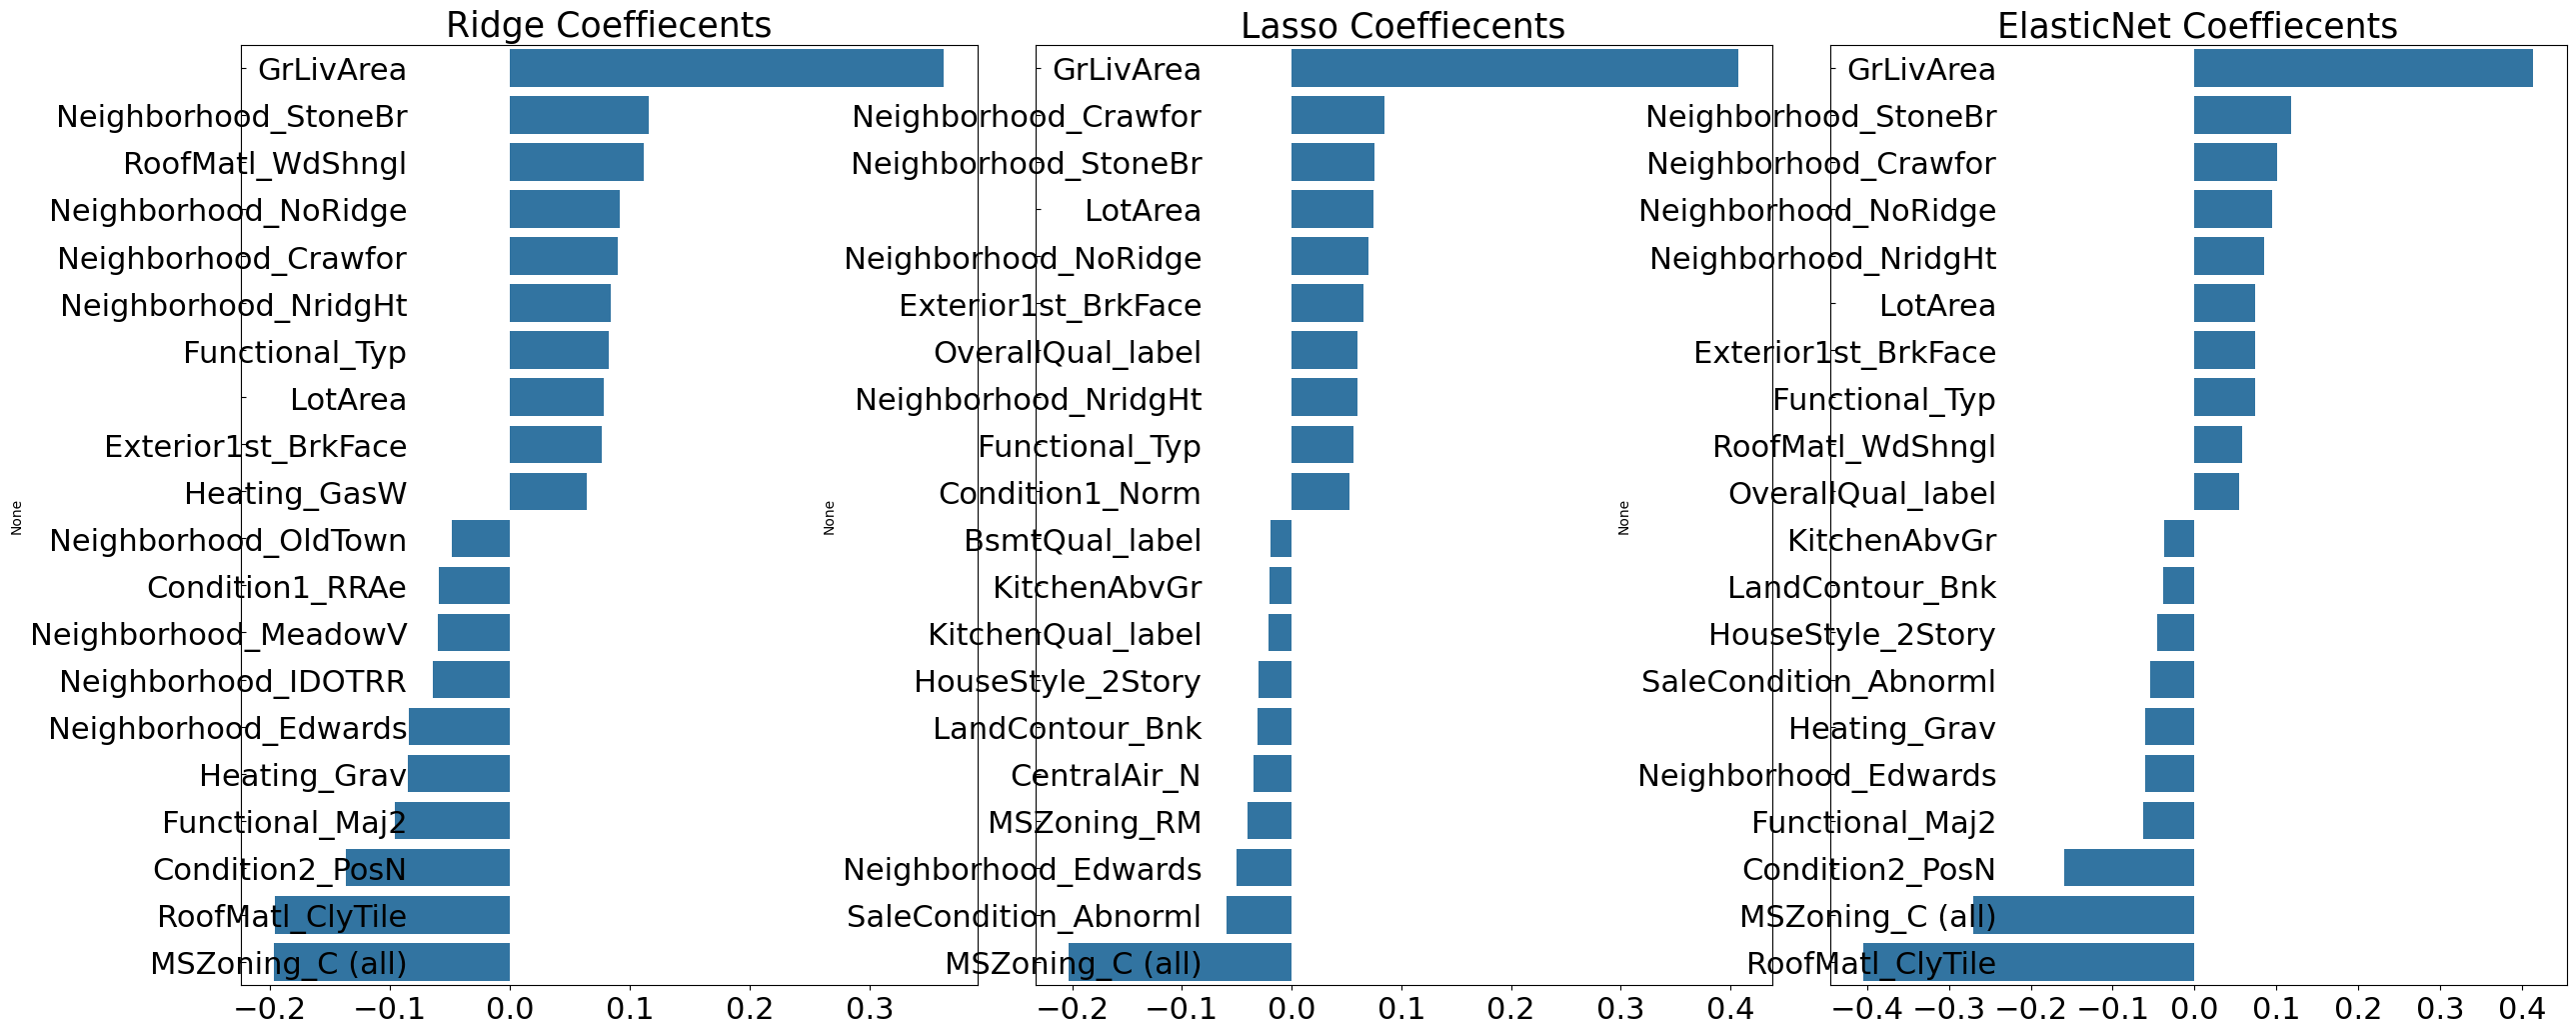

In [13]:
# Checking coef
import matplotlib.pyplot as plt
import seaborn as sns

ridge_estimator = ridge_best.best_estimator_
lasso_estimator = lasso_best.best_estimator_
elastic_estimator = elastic_best.best_estimator_

models = [ridge_estimator, lasso_estimator, elastic_estimator]
visualize_coefficient(models)

Outlier 확인 feature들 : GrLivArea, MSZoning_C(all), RoofMatl_ClyTile

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

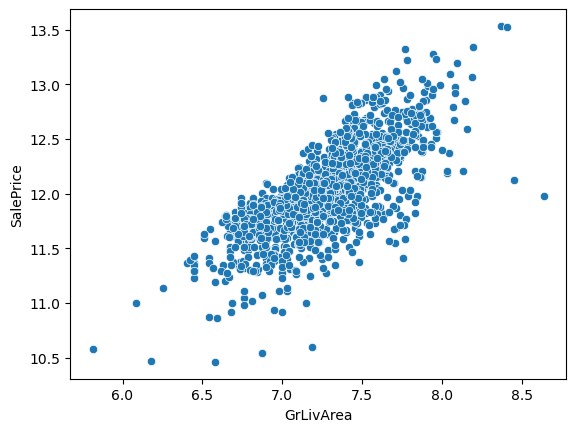

In [14]:
# Checking GrLivArea
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = train_df)

In [15]:
# Remove 2 points
cond1 = train_df['GrLivArea'] > 8.25
cond2 = train_df['SalePrice'] < 12.5
outlier_index = train_df[cond1 & cond2].index

train_df.drop(outlier_index, axis = 0, inplace = True)

<Axes: xlabel='MSZoning_C (all)', ylabel='SalePrice'>

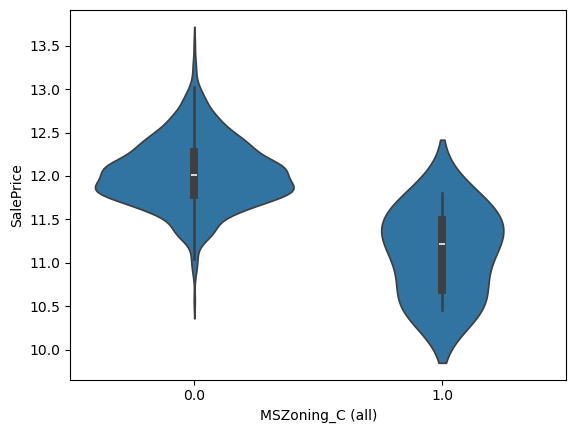

In [16]:
# Checking MSZoning_C (all)
sns.violinplot(x = 'MSZoning_C (all)', y = 'SalePrice', data = train_df)

<Axes: xlabel='RoofMatl_ClyTile', ylabel='SalePrice'>

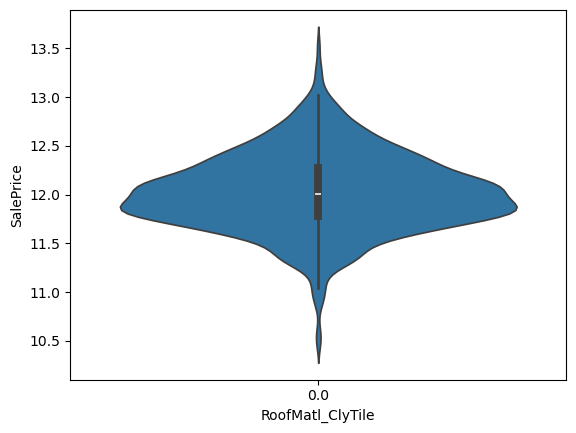

In [17]:
# Checking RoofMatl_ClyTile
sns.violinplot(x = 'RoofMatl_ClyTile', y = 'SalePrice', data = train_df)

In [18]:
test_df.groupby(['RoofMatl_ClyTile']).count()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,OverallCond_label,ExterQual_label,ExterCond_label,BsmtQual_label,BsmtCond_label,BsmtFinType1_label,HeatingQC_label,KitchenQual_label,GarageQual_label,GarageCond_label
RoofMatl_ClyTile,,,,,,,,,,,,,,,,,,,,,
0.0,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,...,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459


In [19]:
# drop feature
train_df.drop('RoofMatl_ClyTile', axis = 1, inplace = True)
test_df.drop('RoofMatl_ClyTile', axis = 1, inplace = True)

In [20]:
Feature = train_df.drop('SalePrice', axis = 1, inplace = False)
Label = train_df['SalePrice']

In [21]:
from sklearn.model_selection import GridSearchCV

ridge_best = GridSearchCV(ridge_model, param_grid = parameter1, scoring = 'neg_root_mean_squared_error', refit = True)
lasso_best = GridSearchCV(lasso_model, param_grid = parameter1, scoring = 'neg_root_mean_squared_error', refit = True)
elastic_best = GridSearchCV(elastic_model, param_grid = parameter2, scoring = 'neg_root_mean_squared_error', refit = True)

ridge_best.fit(Feature, Label)
lasso_best.fit(Feature, Label)
elastic_best.fit(Feature, Label)

print("Ridge 모델 최적 파라미터 :", ridge_best.best_params_, " / RSME :", -ridge_best.best_score_)
print("Lasso 모델 최적 파라미터 :", lasso_best.best_params_, " / RSME :", -lasso_best.best_score_)
print("ElasticNet 모델 최적 파라미터 :", elastic_best.best_params_, " / RSME :", -elastic_best.best_score_)

Ridge 모델 최적 파라미터 : {'alpha': 5}  / RSME : 0.11343473448629142
Lasso 모델 최적 파라미터 : {'alpha': 0.001}  / RSME : 0.11358939573218167
ElasticNet 모델 최적 파라미터 : {'alpha': 0.001, 'l1_ratio': 0.3}  / RSME : 0.11154658897460142


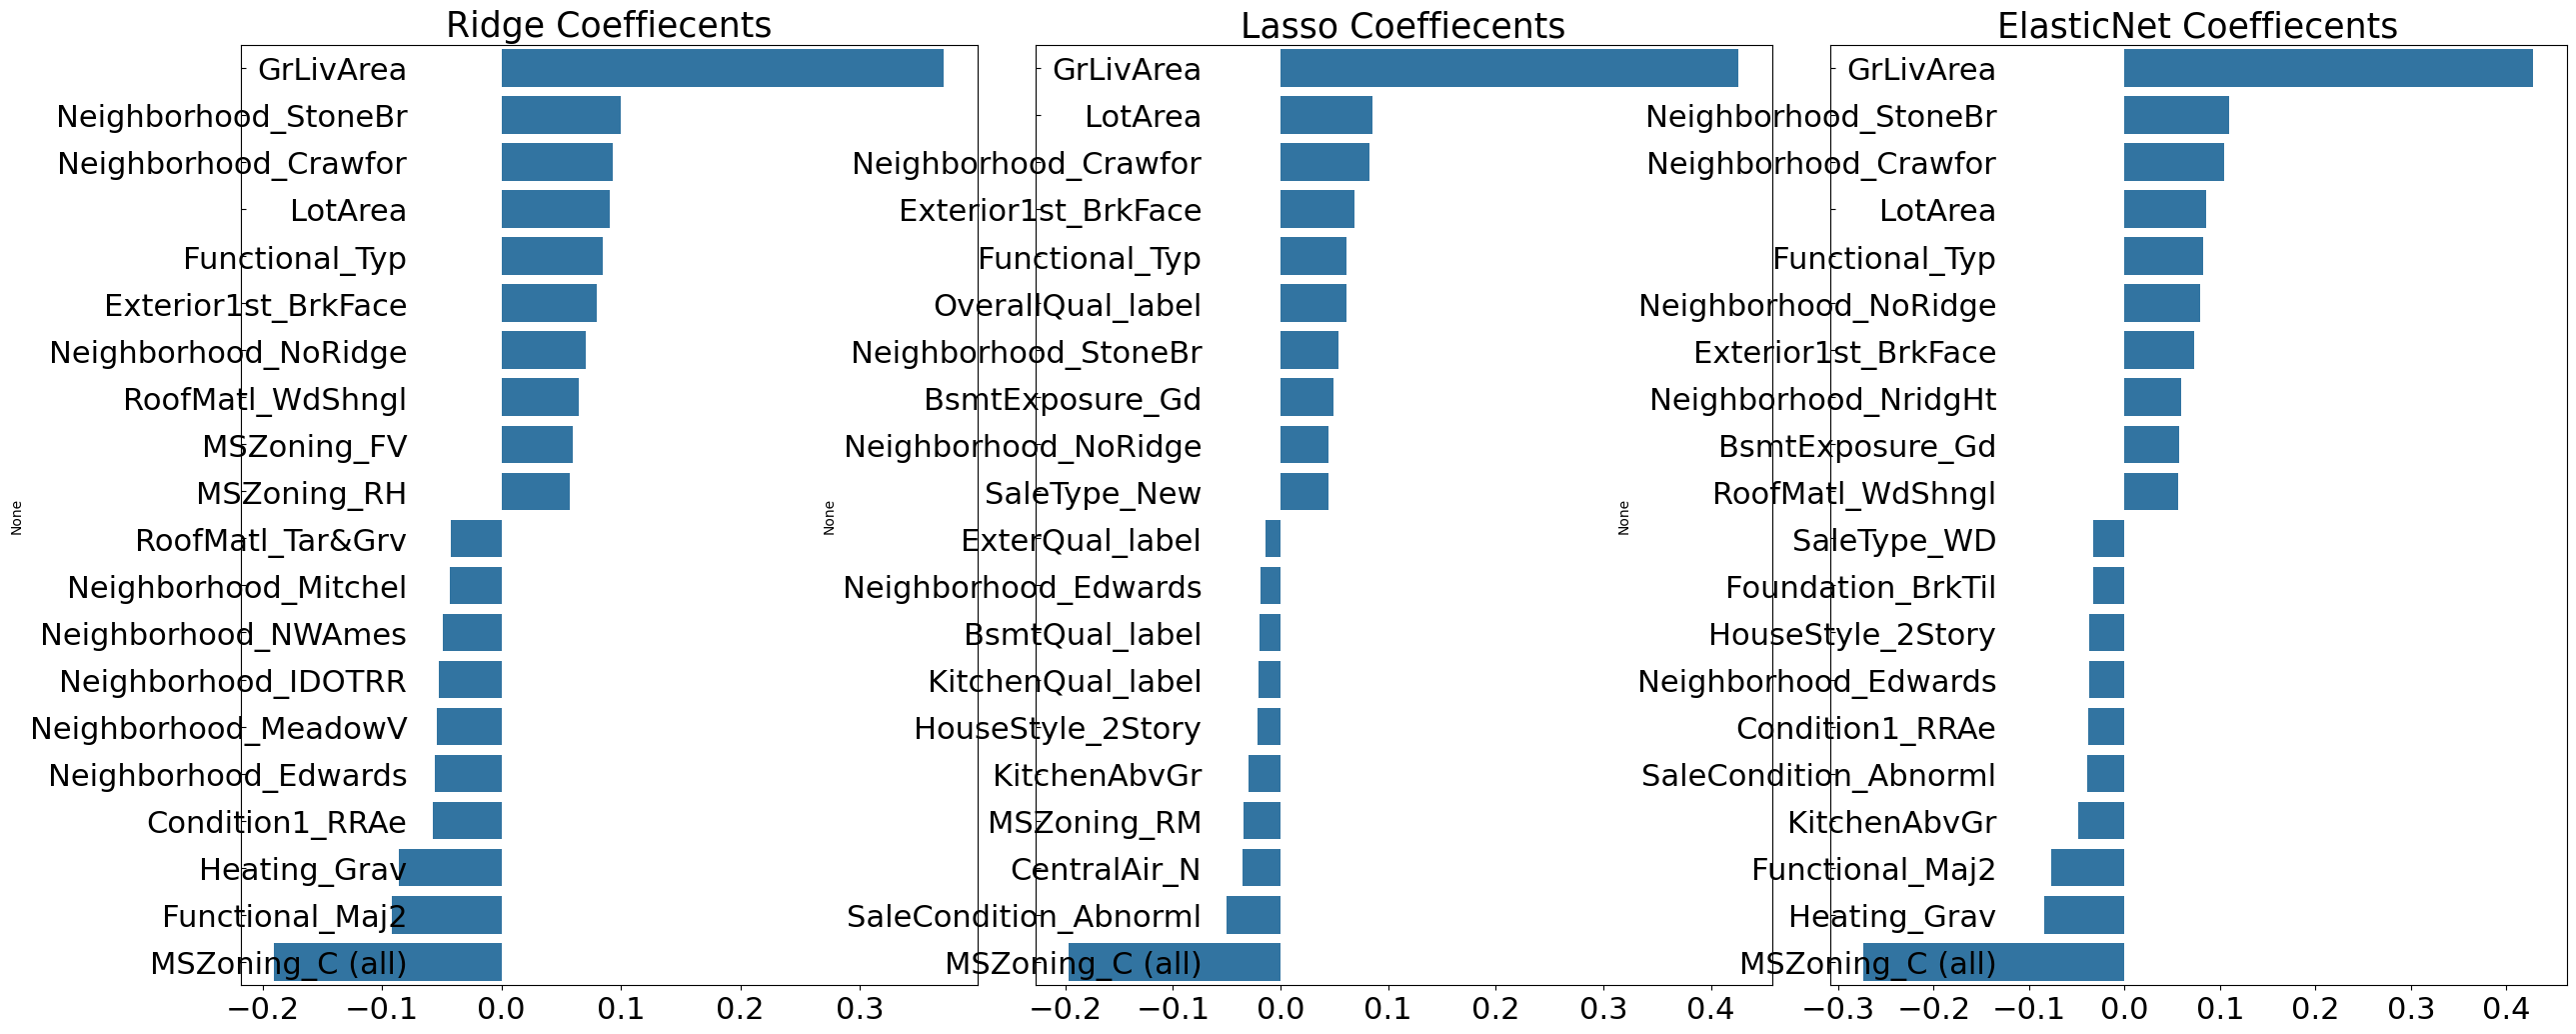

In [22]:
ridge_estimator = ridge_best.best_estimator_
lasso_estimator = lasso_best.best_estimator_
elastic_estimator = elastic_best.best_estimator_

models = [ridge_estimator, lasso_estimator, elastic_estimator]
visualize_coefficient(models)

In [23]:
#submission
prediction = np.expm1(elastic_best.predict(test_df))

submission = pd.DataFrame({
"Id":sub_df['Id'],
"SalePrice": prediction
})
display(submission)

submission.to_csv('submission.csv',index=False)

,Id,SalePrice
0,1461,120282.406995
1,1462,152038.806143
2,1463,175015.389725
3,1464,190067.784600
4,1465,203113.655580
...,...,...
1454,2915,89128.600638
1455,2916,81712.538926
1456,2917,167034.343056
1457,2918,115722.460605


**Score** = 0.12695

### **Regression Tree**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#rf_r = RandomForestRegressor()
xgb_r = XGBRegressor(random_state = 1)
lgb_r = LGBMRegressor(random_state = 1)

#rf_r_score = cross_val_score(rf_r, Feature, Label, cv = 5, scoring = 'neg_root_mean_squared_error')
xgb_r_score = cross_val_score(xgb_r, Feature, Label, cv = 5, scoring = 'neg_root_mean_squared_error')
lgb_r_score = cross_val_score(lgb_r, Feature, Label, cv = 5, scoring = 'neg_root_mean_squared_error')

#print("튜닝 전 RandomForestRegressor RMSE :", -np.mean(rf_r_score))
print("튜닝 전 XGBRegressor RMSE :", -np.mean(xgb_r_score))
print("튜닝 전 LGBMRegressor RMSE :", -np.mean(lgb_r_score))

In [25]:
# hyper parameter
xgb_params = {'n_estimators' : [100, 150, 200], 'max_depth' : [i for i in range(3,11)],
              'colsample_bytree' : [0.5, 0.6, 0.7, 0.8, 0.9, 1]}

lgb_params = {'n_estimators' : [100, 150, 200], 'max_depth' : [i for i in range(3,11)],
              'colsample_bytree' : [0.5, 0.6, 0.7, 0.8, 0.9, 1]}

In [26]:
# Tuning
from sklearn.model_selection import GridSearchCV

xgb_r = XGBRegressor(random_state = 1)
lgb_r = LGBMRegressor(random_state = 1)

xgb_grid = GridSearchCV(xgb_r, cv = 5, param_grid = xgb_params, scoring = 'neg_root_mean_squared_error', refit = True)
lgb_grid = GridSearchCV(lgb_r, cv = 5, param_grid = lgb_params, scoring = 'neg_root_mean_squared_error', refit = True)

xgb_grid.fit(Feature, Label)
lgb_grid.fit(Feature, Label)

print("XGBRegressor 모델 최적 파라미터 :", xgb_grid.best_params_, " / RSME :", -xgb_grid.best_score_)
print("LGBMRegressor 모델 최적 파라미터 :", lgb_grid.best_params_, " / RSME :", -lgb_grid.best_score_)

XGBRegressor 모델 최적 파라미터 : {'colsample_bytree': 0.8, 'max_depth': 3, 'n_estimators': 100}  / RSME : 0.12351528020713558
LGBMRegressor 모델 최적 파라미터 : {'colsample_bytree': 0.7, 'max_depth': 3, 'n_estimators': 200}  / RSME : 0.11823838799865458


In [28]:
#submission
prediction = np.expm1(lgb_grid.predict(test_df))

submission = pd.DataFrame({
"Id":sub_df['Id'],
"SalePrice": prediction
})
display(submission)

submission.to_csv('submission.csv',index=False)

,Id,SalePrice
0,1461,121558.120276
1,1462,146430.870831
2,1463,181459.959196
3,1464,192228.418966
4,1465,190828.056225
...,...,...
1454,2915,81235.704691
1455,2916,85459.185840
1456,2917,163215.046416
1457,2918,119692.988551


**Score** : 0.13130

### **Mixed**

In [29]:
# ridge_estimator, elastic_estimator
# 0.4 0.6
#submission
prediction = np.expm1(0.4 * ridge_estimator.predict(test_df) + 0.6 * elastic_estimator.predict(test_df))

submission = pd.DataFrame({
"Id":sub_df['Id'],
"SalePrice": prediction
})
display(submission)

submission.to_csv('submission.csv',index=False)

,Id,SalePrice
0,1461,120632.921164
1,1462,151808.802051
2,1463,174661.456996
3,1464,189909.936570
4,1465,202981.316763
...,...,...
1454,2915,88151.102555
1455,2916,80331.441129
1456,2917,167386.710488
1457,2918,115431.929519


**Score** = 0.12683

In [61]:
# ridge_estimator, lasso_estimator, elastic_estimator
# 0.3 0.7
#submission
prediction = np.expm1(0.3 * ridge_estimator.predict(test_df) +0.3 * lasso_estimator.predict(test_df) + 0.4 * elastic_estimator.predict(test_df))

submission = pd.DataFrame({
"Id":sub_df['Id'],
"SalePrice": prediction
})
display(submission)

submission.to_csv('submission.csv',index=False)

,Id,SalePrice
0,1461,120726.422794
1,1462,153698.488182
2,1463,177087.497054
3,1464,197819.356135
4,1465,200976.923187
...,...,...
1454,2915,89869.254505
1455,2916,81608.664084
1456,2917,167565.916270
1457,2918,118030.127715


**Score** : 0.12625

LGBMRegressor 모델 최적 파라미터 : {'colsample_bytree': 0.7, 'max_depth': 3, 'n_estimators': 200}  / RSME : 0.11823838799865458

In [23]:
from lightgbm import LGBMRegressor

lgb_r = LGBMRegressor(random_state = 1, colsample_bytree = 0.7, max_depth = 3, n_estimators = 200)

lgb_r.fit(Feature, Label)

LGBMRegressor(colsample_bytree=0.7, max_depth=3, n_estimators=200,
              random_state=1)

In [26]:
#submission
prediction = np.expm1(0.3 * ridge_estimator.predict(test_df) +0.3 * lgb_r.predict(test_df) + 0.4 * elastic_estimator.predict(test_df))

submission = pd.DataFrame({
"Id":sub_df['Id'],
"SalePrice": prediction
})
display(submission)

submission.to_csv('submission.csv',index=False)

,Id,SalePrice
0,1461,120927.331834
1,1462,150163.639709
2,1463,176655.937977
3,1464,190594.611964
4,1465,199249.739309
...,...,...
1454,2915,85969.429795
1455,2916,81766.867627
1456,2917,166141.642762
1457,2918,116679.402691


**Score** = 0.12371

### **LGBM learning rate tuning**

from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error
from lightgbm import LGBMRegressor

# search space
search_space = {'learning_rate' : hp.uniform('learning_rate', 0.01, 0.3)}

def objective(space):
    lgb_r = LGBMRegressor(random_state = 1, colsample_bytree = 0.7, max_depth = 3, n_estimators = 200, learning_rate = space['learning_rate'],
                         early_stopping_rounds = 50)

    fold = KFold(n_splits = 5)

    score_list = []
    
    for tr_index, val_index in fold.split(Feature):
        X_tr, X_val = Feature.iloc[tr_index], Feature.iloc[val_index]
        y_tr, y_val = Label.iloc[tr_index], Label.iloc[val_index]

        eval = [(X_val, y_val)]

        lgb_r.fit(X_tr, y_tr, eval_set = eval, eval_metric = 'rmse')
        pred = lgb_r.predict(X_val)

        score_list.append(root_mean_squared_error(y_val, pred))

    return {'loss' : np.mean(score_list), 'STATUS' : STATUS_OK}

trials = Trials()
best = fmin(fn = objective, space = search_space, trials = trials, max_evals = 30, algo = tpe.suggest)

In [47]:
from lightgbm import LGBMRegressor

lgb_r = LGBMRegressor(random_state = 1, colsample_bytree = 0.7, max_depth = 3, n_estimators = 200, learning_rate = 0.09)

lgb_r.fit(Feature, Label)

LGBMRegressor(colsample_bytree=0.7, learning_rate=0.09, max_depth=3,
              n_estimators=200, random_state=1)

In [49]:
#submission
prediction = np.expm1(0.35 * lasso_estimator.predict(test_df) +0.3 * lgb_r.predict(test_df) + 0.35 * ridge_estimator.predict(test_df))

submission = pd.DataFrame({
"Id":sub_df['Id'],
"SalePrice": prediction
})
display(submission)

submission.to_csv('submission.csv',index=False)

,Id,SalePrice
0,1461,119817.001182
1,1462,149635.174577
2,1463,177242.063910
3,1464,190532.898655
4,1465,197496.411662
...,...,...
1454,2915,85464.184573
1455,2916,80944.929598
1456,2917,165735.438642
1457,2918,117032.158845


**Score** = 12.353